---

# Part 1: Download the Wikipedia pages of characters

In [ ]:
import re
import requests
import os
import time
from urllib.parse import quote, unquote

WIKI_API_URL = "https://en.wikipedia.org/w/api.php"

def extract_character_links(source_file, output_file="simpsons_characters_links.txt"):
    """Extract Wikipedia character links from Appearances.txt file and save them to a file."""
    with open(source_file, encoding="utf-8") as f:
        lines = f.readlines()

    links = []
    
    for line in lines:
        line = line.strip()
        
        # Look for lines that start with | and contain [[...]]
        # Skip header lines (!) and separator lines (|-)
        if line.startswith("|") and not line.startswith(("|-", "|}", "! ")):
            if "[[" in line:
                # Extract the first [[...]] link
                link_match = re.search(r'\[\[([^\]]+)\]\]', line)
                if link_match:
                    inner = link_match.group(1).strip()
                    
                    # Take the left side if there's a pipe
                    character_page = inner.split("|")[0].strip()
                    
                    # Skip special namespaces
                    if ":" in character_page and not character_page.startswith(("List of", "Simpson")):
                        continue
                    
                    if character_page.lower().startswith(("file:", "image:", "category:")):
                        continue
                    
                    # URL generation
                    url = f"https://en.wikipedia.org/wiki/{quote(character_page.replace(' ', '_'))}"
                    links.append(url)

    # Deduplicate and sort
    links = sorted(set(links))

    # Write links to file
    with open(output_file, "w", encoding="utf-8") as f:
        for link in links:
            f.write(link + "\n")

    print(f"Extracted {len(links)} character links → {output_file}")
    return links

def sanitize_filename(name):
    """Remove or replace characters invalid in Windows filenames."""
    return re.sub(r'[<>:"/\\|?*]', '_', name)

def load_character_links(input_file):
    """Load character links from a text file and extract page titles."""
    character_links = []
    with open(input_file, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith("https://en.wikipedia.org/wiki/"):
                title = line.split("/wiki/")[-1]
            else:
                title = line
            title = unquote(title)
            character_links.append(title)
    return character_links

def fetch_wikitext(page_title):
    """Fetch wikitext content from Wikipedia API."""
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/140.0.0.0 Safari/537.36"
    }
    params = {
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "revisions",
        "rvprop": "content",
        "redirects": 1
    }
    try:
        response = requests.get(WIKI_API_URL, params=params, headers=headers, timeout=10)
        response.raise_for_status()
        data = response.json()
        pages = data.get("query", {}).get("pages", {})
        for page_id, page_data in pages.items():
            if "revisions" in page_data:
                return page_data["revisions"][0]["*"]
    except requests.exceptions.RequestException as e:
        print(f"HTTP error fetching {page_title}: {e}")
    except ValueError as e:
        print(f"JSON decode error for {page_title}: {e}")
    return None

def download_character_pages(input_file, output_dir="simpsons_character_pages", delay=0.5):
    """Download Wikipedia pages for all characters in the input file."""
    os.makedirs(output_dir, exist_ok=True)
    
    character_links = load_character_links(input_file)
    print(f"Total characters found: {len(character_links)}\n")
    
    success_count = 0
    skip_count = 0
    fail_count = 0

    for idx, title in enumerate(character_links, 1):
        page_title = title.replace(" ", "_")
        safe_filename = sanitize_filename(page_title)
        filename = os.path.join(output_dir, f"{safe_filename}.txt")
        
        print(f"[{idx}/{len(character_links)}] Processing: {page_title}", end="")
        
        if os.path.exists(filename):
            print(" - SKIPPED (already exists)")
            skip_count += 1
            continue
        
        wikitext = fetch_wikitext(page_title)
        
        if wikitext:
            with open(filename, "w", encoding="utf-8") as f:
                f.write(wikitext)
            print(" - SAVED ✓")
            success_count += 1
        else:
            print(" - FAILED ✗")
            fail_count += 1
        
        time.sleep(delay)

    print(f"\n{'='*60}")
    print(f"Download complete!")
    print(f"  Saved: {success_count}")
    print(f"  Skipped: {skip_count}")
    print(f"  Failed: {fail_count}")
    print(f"  Total: {len(character_links)}")
    print(f"  Output directory: {output_dir}")
    print(f"{'='*60}")
    
    return {
        "success": success_count,
        "skipped": skip_count,
        "failed": fail_count,
        "total": len(character_links)
    }

print("✓ All functions loaded successfully!")

✓ All functions loaded successfully!


Extract character links from Simpsons.txt

In [6]:
links = extract_character_links("Appearances.txt", "simpsons_characters_links.txt")

Extracted 110 character links → simpsons_characters_links.txt


Download all character Wikipedia pages

In [7]:
stats = download_character_pages(
    input_file="simpsons_characters_links.txt",
    output_dir="simpsons_character_pages",
    delay=0.5
)

Total characters found: 110

[1/110] Processing: Üter_Zörker - SAVED ✓
[2/110] Processing: Agnes_Skinner - SAVED ✓
[3/110] Processing: Alice_Glick - SAVED ✓
[4/110] Processing: Apu_Nahasapeemapetilon - SAVED ✓
[5/110] Processing: Arnie_Pye - SAVED ✓
[6/110] Processing: Artie_Ziff - SAVED ✓
[7/110] Processing: Baby_Gerald - SAVED ✓
[8/110] Processing: Barney_Gumble - SAVED ✓
[9/110] Processing: Bart_Simpson - SAVED ✓
[10/110] Processing: Bernice_Hibbert - SAVED ✓
[11/110] Processing: Bleeding_Gums_Murphy - SAVED ✓
[12/110] Processing: Blue-Haired_Lawyer - SAVED ✓
[13/110] Processing: Booberella - SAVED ✓
[14/110] Processing: Brandine_Spuckler - SAVED ✓
[15/110] Processing: Bumblebee_Man - SAVED ✓
[16/110] Processing: Carl_Carlson - SAVED ✓
[17/110] Processing: Chief_Wiggum - SAVED ✓
[18/110] Processing: Cletus_Spuckler - SAVED ✓
[19/110] Processing: Comic_Book_Guy - SAVED ✓
[20/110] Processing: Cookie_Kwan - SAVED ✓
[21/110] Processing: Crazy_Cat_Lady - SAVED ✓
[22/110] Processing: Data

---

# Part 2: Building the networks


*Exercise*: Build the network of Simpsons characters


In [9]:
import os
import re
import networkx as nx

# -----------------------
# Helper: Sanitize character names
# -----------------------
def sanitize_filename(name):
    """Replace characters invalid in Windows filenames with underscore."""
    # Replace spaces and invalid characters with _
    return re.sub(r'[<>:"/\\|?* ]', '_', name)

# -----------------------
# Step 1: Load characters from folder
# -----------------------
data_dir = "simpsons_character_pages"
character_files = sorted(os.listdir(data_dir))

# Use sanitized filenames as character identifiers
character_set = set([os.path.splitext(f)[0] for f in character_files])
character_names = sorted(character_set)

print(f"Found {len(character_names)} character pages.")

# -------------------------------
# Step 2: Function to extract links
# -------------------------------
def extract_links_from_page(text):
    """
    Extract links to other characters from Wikipedia page text.
    Links are in the form [[Character]] or [[Character|Label]].
    Only keep links that are in character_set.
    """
    pattern = re.compile(r"\[\[([^\]]+)\]\]")  # [[Character]] or [[Character|Label]]
    links = []
    for match in pattern.finditer(text):
        inner = match.group(1).strip()

        # Take the left side if there's a pipe
        character_page = inner.split("|")[0].strip()

        # Sanitize (spaces and invalid chars → _)
        character_page = sanitize_filename(character_page)

        links.append(character_page)
    return links

# ------------------------
# Step 3: Build the network
# ------------------------
G = nx.DiGraph()

for idx, character_name in enumerate(character_names, 1):
    print(f"[{idx}/{len(character_names)}] Processing: {character_name}")

    file_path = os.path.join(data_dir, f"{character_name}.txt")
    if not os.path.exists(file_path):
        print(f"  -> Missing page: {character_name}")
        continue

    with open(file_path, encoding="utf-8") as f:
        text = f.read()

    # Count words in page
    word_count = len(re.findall(r"\w+", text))

    # Add character node
    G.add_node(character_name, word_count=word_count)

    # Extract links and add edges
    links = extract_links_from_page(text)

    # Filter only characters
    valid_links = [target for target in links if target in character_set]

    # Debug: only print character links for the first page
    if idx == 1:
        print("DEBUG - Character links (sanitized):", valid_links[:10])  # Show first 10

    # Add edges
    edge_count = 0
    for target in valid_links:
        G.add_edge(character_name, target)
        edge_count += 1
    print(f"  -> Added {edge_count} edges")

# ----------------------------------
# Step 4: Remove isolated characters
# ----------------------------------
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)
print(f"\nRemoved {len(isolated)} isolated characters.")

# ----------------------------------------------------
# Step 5: Keep only the largest weakly connected component
# ----------------------------------------------------
if len(list(nx.weakly_connected_components(G))) > 0:
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()

print(f"\nFinal network: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# ----------------------------------------------------
# Step 6: Save network statistics
# ----------------------------------------------------
print("\n" + "="*60)
print("Network Statistics:")
print("="*60)
print(f"Total Characters: {G.number_of_nodes()}")
print(f"Total Connections: {G.number_of_edges()}")
print(f"Average Degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

# Top 10 most connected characters
degree_centrality = nx.degree_centrality(G)
top_characters = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Most Connected Characters:")
for i, (char, centrality) in enumerate(top_characters, 1):
    print(f"  {i}. {char.replace('_', ' ')}: {centrality:.4f}")

print("="*60)

Found 110 character pages.
[1/110] Processing: Agnes_Skinner
DEBUG - Character links (sanitized): ['Homer_Simpson', 'Marge_Simpson', 'Bart_Simpson', 'Lisa_Simpson', 'Maggie_Simpson', 'Principal_Skinner', 'Edna_Krabappel', 'Comic_Book_Guy', 'Ralph_Wiggum', 'Kent_Brockman']
  -> Added 166 edges
[2/110] Processing: Alice_Glick
  -> Added 166 edges
[3/110] Processing: Apu_Nahasapeemapetilon
  -> Added 11 edges
[4/110] Processing: Arnie_Pye
  -> Added 166 edges
[5/110] Processing: Artie_Ziff
  -> Added 166 edges
[6/110] Processing: Baby_Gerald
  -> Added 166 edges
[7/110] Processing: Barney_Gumble
  -> Added 7 edges
[8/110] Processing: Bart_Simpson
  -> Added 31 edges
[9/110] Processing: Bernice_Hibbert
  -> Added 166 edges
[10/110] Processing: Bleeding_Gums_Murphy
  -> Added 166 edges
[11/110] Processing: Blue-Haired_Lawyer
  -> Added 166 edges
[12/110] Processing: Booberella
  -> Added 166 edges
[13/110] Processing: Brandine_Spuckler
  -> Added 166 edges
[14/110] Processing: Bumblebee_Man

*Excercise*: Explain your process in words:

*Exercise*: Simple network statistics and analysis
> * What is the number of nodes in the network? 

110 nodes

> * More importantly, what is the number of links?

3289 edges


> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

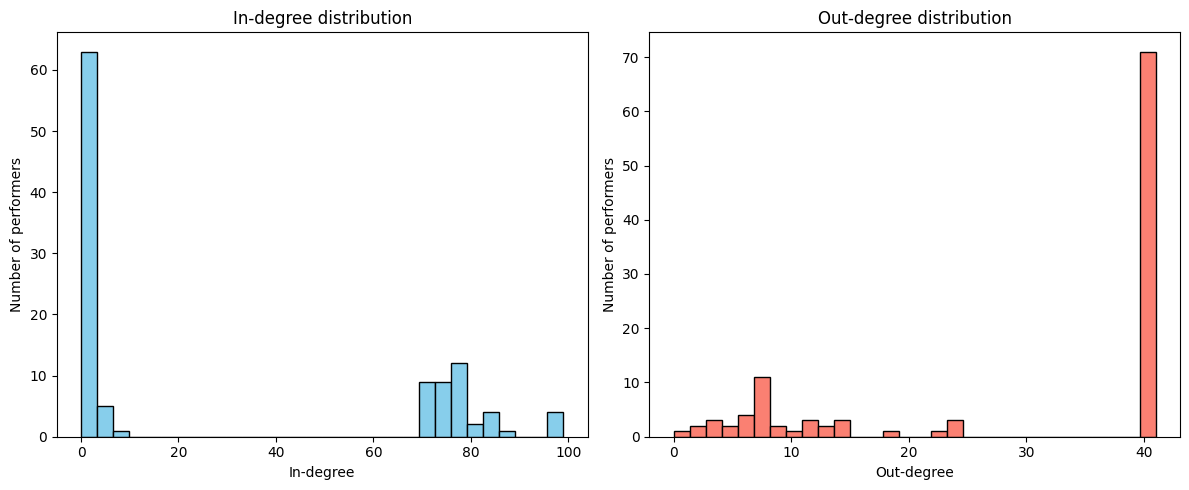

In [11]:
import matplotlib.pyplot as plt

in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='skyblue', edgecolor='black')
plt.title("In-degree distribution")
plt.xlabel("In-degree")
plt.ylabel("Number of performers")

plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=30, color='salmon', edgecolor='black')
plt.title("Out-degree distribution")
plt.xlabel("Out-degree")
plt.ylabel("Number of performers")

plt.tight_layout()
plt.show()


> * Compare the out-degree distribution to a *random network* with the same number of nodes and links.

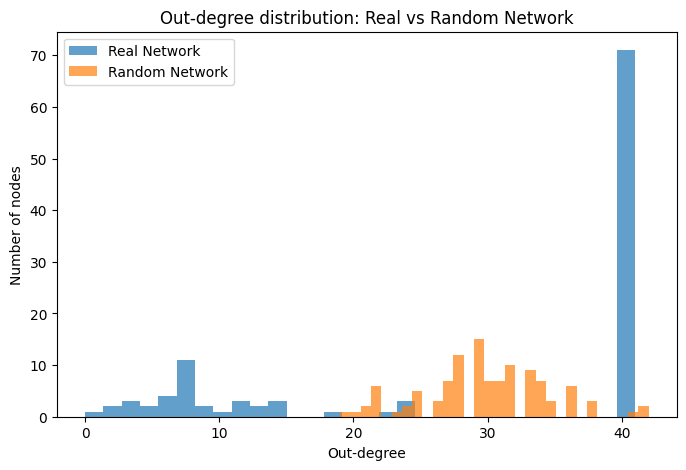

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

# Generate directed random network with same nodes and edges
random_G = nx.gnm_random_graph(n_nodes, n_edges, directed=True)

# Extract out-degrees
real_out_deg = [d for n, d in G.out_degree()]
rand_out_deg = [d for n, d in random_G.out_degree()]

# Plot
plt.figure(figsize=(8,5))
plt.hist(real_out_deg, bins=30, alpha=0.7, label="Real Network")
plt.hist(rand_out_deg, bins=30, alpha=0.7, label="Random Network")
plt.xlabel("Out-degree")
plt.ylabel("Number of nodes")
plt.title("Out-degree distribution: Real vs Random Network")
plt.legend()
plt.show()

> * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.

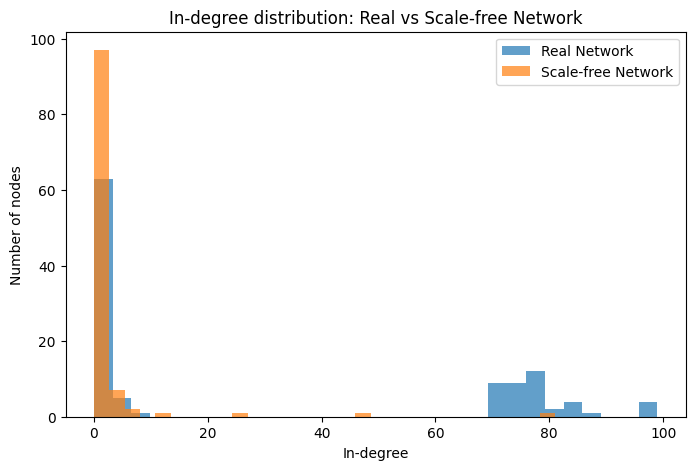

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

sf_G = nx.scale_free_graph(n_nodes, seed=42)  # note: directed

# Extract in-degrees
real_in_deg = [d for n, d in G.in_degree()]
sf_in_deg = [d for n, d in sf_G.in_degree()]

# Plot
plt.figure(figsize=(8,5))
plt.hist(real_in_deg, bins=30, alpha=0.7, label="Real Network")
plt.hist(sf_in_deg, bins=30, alpha=0.7, label="Scale-free Network")
plt.xlabel("In-degree")
plt.ylabel("Number of nodes")
plt.title("In-degree distribution: Real vs Scale-free Network")
plt.legend()
plt.show()

> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?



In [13]:
# Top 5 by in-degree
top_in = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree:")
for name, deg in top_in:
    print(f"{name}: {deg} incoming links")

# Top 5 by out-degree
top_out = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 performers by out-degree:")
for name, deg in top_out:
    print(f"{name}: {deg} outgoing links")


Top 5 performers by in-degree:
Homer_Simpson: 99 incoming links
Bart_Simpson: 98 incoming links
Marge_Simpson: 97 incoming links
Lisa_Simpson: 97 incoming links
Maggie_Simpson: 87 incoming links

Top 5 performers by out-degree:
Agnes_Skinner: 41 outgoing links
Drederick_Tatum: 41 outgoing links
Cletus_Spuckler: 41 outgoing links
Lenny_Leonard: 41 outgoing links
Luann_Van_Houten: 41 outgoing links


> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

In [14]:
# Use the word_count node attribute
longest_pages = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]

print("10 pages with the longest content:")
for name, attr in longest_pages:
    print(f"{name}: {attr['word_count']} words")


10 pages with the longest content:
Agnes_Skinner: 44638 words
Drederick_Tatum: 44638 words
Cletus_Spuckler: 44638 words
Lenny_Leonard: 44638 words
Luann_Van_Houten: 44638 words
Lunchlady_Doris: 44638 words
Manjula_Nahasapeemapetilon: 44638 words
Rainier_Wolfcastle: 44638 words
Sideshow_Mel: 44638 words
Alice_Glick: 44638 words


# Part 3: Visualizing the networks

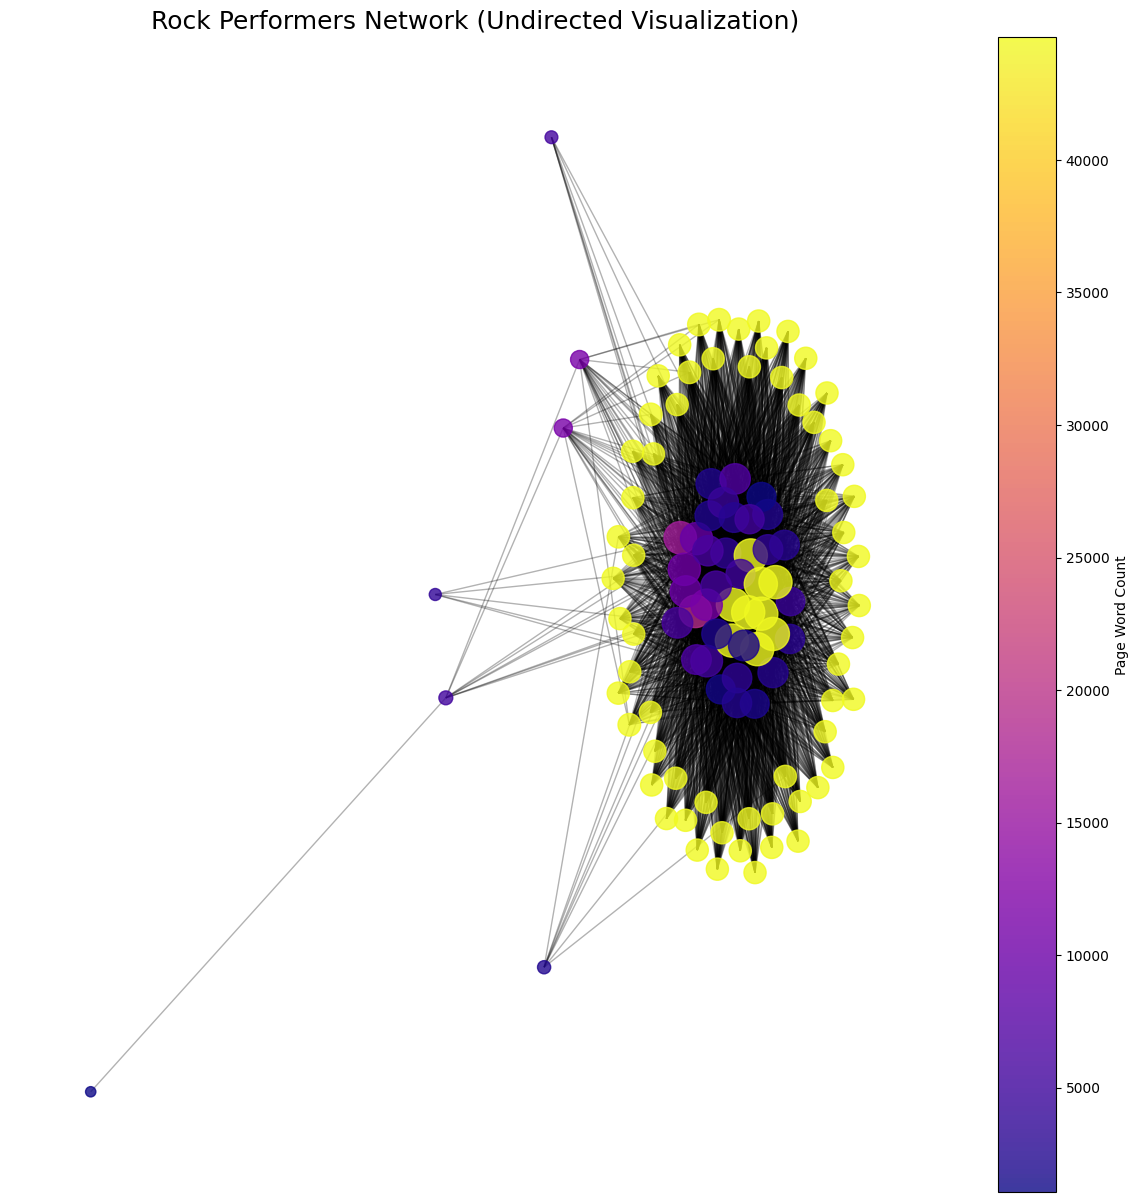

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Convert to undirected graph for visualization
G_undirected = G.to_undirected()

plt.figure(figsize=(15, 15))

# Use spring layout (or Kamada-Kawai)
pos = nx.spring_layout(G_undirected, k=0.15, iterations=50, seed=42)

# Node size proportional to degree
node_sizes = [50 + 5 * G_undirected.degree(n) for n in G_undirected.nodes()]

# Node color based on word count (length of content)
node_colors = []
for n, data in G_undirected.nodes(data=True):
    wc = data.get("word_count", 1)  # fallback to 1 if missing
    node_colors.append(wc)

# Draw nodes with a sequential colormap
nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,  # simple sequential colormap
    alpha=0.8
)

# Draw edges
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

# Title and colorbar
plt.title("Rock Performers Network (Undirected Visualization)", fontsize=18)
plt.colorbar(nodes, label="Page Word Count")
plt.axis("off")
plt.show()